In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style='whitegrid', palette='pastel', color_codes=True) 
sns.mpl.rc('figure', figsize=(10,6))

In [3]:
#opening the vector map
shp_path = '\\District_Boundary.shp'
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

In [4]:
len(sf.shapes())

33

In [5]:
sf.records()

[Record #0: ['JAISALMER', 'RAJASTHAN', 508247, 38487.17, 1],
 Record #1: ['BARMER', 'RAJASTHAN', 1964835, 28550.95, 2],
 Record #2: ['JALOR', 'RAJASTHAN', 1448940, 10647.4, 3],
 Record #3: ['DUNGARPUR', 'RAJASTHAN', 1107643, 3770.78, 4],
 Record #4: ['JHALAWAR', 'RAJASTHAN', 1180323, 6315.27, 5],
 Record #5: ['BARAN', 'RAJASTHAN', 1021653, 6993.94, 6],
 Record #6: ['BUNDI', 'RAJASTHAN', 962620, 5776.48, 7],
 Record #7: ['TONK', 'RAJASTHAN', 1211547, 7190.38, 8],
 Record #8: ['BHILWARA', 'RAJASTHAN', 2013789, 10445.18, 9],
 Record #9: ['NAGAUR', 'RAJASTHAN', 2761447, 17805.1, 10],
 Record #10: ['JODHPUR', 'RAJASTHAN', 2876652, 22696.9, 11],
 Record #11: ['BIKANER', 'RAJASTHAN', 1902110, 30279.27, 12],
 Record #12: ['CHURU', 'RAJASTHAN', 1688266, 13844.05, 13],
 Record #13: ['JHUNJHUNUN', 'RAJASTHAN', 1913689, 5911.03, 14],
 Record #14: ['SIKAR', 'RAJASTHAN', 2283647, 7726.75, 15],
 Record #15: ['DHAULPUR', 'RAJASTHAN', 977771, 3040.33, 16],
 Record #16: ['HANUMANGARH', 'RAJASTHAN', 1518

In [6]:
sf.records()[0][0]

'JAISALMER'

In [7]:
df1 = pd.read_csv('Rajasthan.csv')
df1 = df1.drop(['Unnamed: 0'], axis=1)
df1 = df1.drop(1)
df1['DIST_NAME'] = df1['DIST_NAME'].str.upper()
df1.DIST_NAME = df1.DIST_NAME.replace({'JHUNJHUNU': 'JHUNJHUNUN'})
df1

,DIST_NAME,Count
0,JAIPUR,808
2,KOTA,158
3,AJMER,123
4,TONK,115
5,NAGAUR,113
6,BHARATPUR,110
7,BANSWARA,62
8,EVACUEES*,61
9,JHUNJHUNUN,42
10,BIKANER,37


In [8]:
def read_shapefile(sf):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
#fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
#converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
#assigning the coordinates
    df = df.assign(coords=shps)
    return df
df = read_shapefile(sf)
df.head()

,DIST_NAME,STATE_NAME,POPULATION,AREA_SQ_KM,ID,coords
0,JAISALMER,RAJASTHAN,508247,38487.17,1,"[(157738.06250418897, 2935783.500131789), (157..."
1,BARMER,RAJASTHAN,1964835,28550.95,2,"[(157738.06250418897, 2935783.500131789), (157..."
2,JALOR,RAJASTHAN,1448940,10647.40,3,"[(277249.4687781143, 2855619.49987793), (27736..."
3,DUNGARPUR,RAJASTHAN,1107643,3770.78,4,"[(359076.6875831379, 2650354.999858649), (3591..."
4,JHALAWAR,RAJASTHAN,1180323,6315.27,5,"[(684142.7499112426, 2703277.749951222), (6841..."


In [9]:
result = pd.merge(df, df1, left_on='DIST_NAME', right_on='DIST_NAME', how='outer', sort=False);
result['Count'] = result['Count'].fillna(0)
result = result[result.isnull().sum(axis=1) < 2]
result

,DIST_NAME,STATE_NAME,POPULATION,AREA_SQ_KM,ID,coords,Count
0,JAISALMER,RAJASTHAN,508247.0,38487.17,1.0,"[(157738.06250418897, 2935783.500131789), (157...",34.0
1,BARMER,RAJASTHAN,1964835.0,28550.95,2.0,"[(157738.06250418897, 2935783.500131789), (157...",2.0
2,JALOR,RAJASTHAN,1448940.0,10647.40,3.0,"[(277249.4687781143, 2855619.49987793), (27736...",0.0
3,DUNGARPUR,RAJASTHAN,1107643.0,3770.78,4.0,"[(359076.6875831379, 2650354.999858649), (3591...",6.0
4,JHALAWAR,RAJASTHAN,1180323.0,6315.27,5.0,"[(684142.7499112426, 2703277.749951222), (6841...",30.0
5,BARAN,RAJASTHAN,1021653.0,6993.94,6.0,"[(658360.4376832014, 2814332.2501717885), (658...",0.0
6,BUNDI,RAJASTHAN,962620.0,5776.48,7.0,"[(597450.3749416292, 2861940.9998981967), (597...",0.0
7,TONK,RAJASTHAN,1211547.0,7190.38,8.0,"[(524982.2500702137, 2884888.2497936687), (524...",115.0
8,BHILWARA,RAJASTHAN,2013789.0,10445.18,9.0,"[(528686.8748018702, 2809025.5001498926), (528...",34.0
9,NAGAUR,RAJASTHAN,2761447.0,17805.10,10.0,"[(450183.1252044361, 2933173.999935579), (4501...",113.0


In [10]:
def plot_shape(id, s=None):
    plt.figure()
    #plotting the graphical axes where map ploting will be done
    ax = plt.axes()
    ax.set_aspect('equal')
#storing the id number to be worked upon
    shape_ex = sf.shape(id)
#NP.ZERO initializes an array of rows and column with 0 in place of each elements 
    #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    x_lon = np.zeros((len(shape_ex.points),1))
#an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
#plotting using the derived coordinated stored in array created by numpy
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
# use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

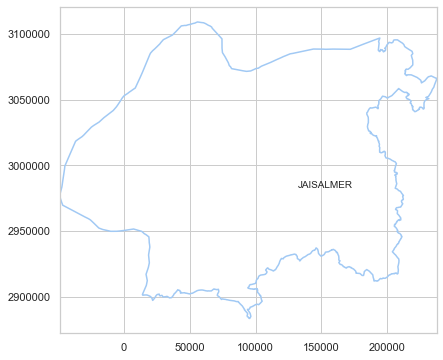

In [11]:
DIST_NAME = 'JAISALMER'
#to get the id of the city map to be plotted
com_id = df[df.DIST_NAME == 'JAISALMER'].index[0]
plot_shape(com_id, DIST_NAME)
sf.shape(com_id)

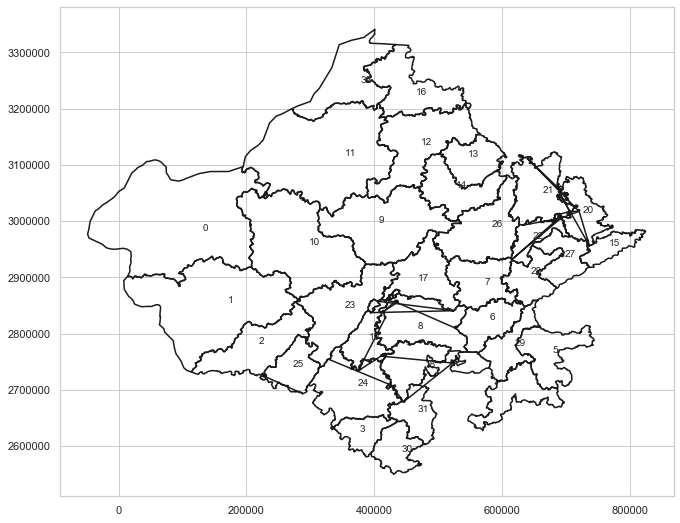

In [12]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
#calling the function and passing required parameters to plot the full map
plot_map(sf)

In [13]:
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
   
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, result.DIST_NAME[id] +"\n"+ str(result.Count[id]), fontsize=13)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
#plot_map_fill(0, sf, x_lim, y_lim, color=’y’)
# plot_map_fill(13, sf,color='y')

In [14]:
result.Count[0]

34.0

In [15]:
def plot_map_fill_multiples_ids(title, city, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
  
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in city:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, result.Count[id], fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [16]:
def plot_cities_2(sf, title, cities, color):
    
    df = read_shapefile(sf)
    city_id = []
    for i in cities:
        city_id.append(df[df.DIST_NAME == i.upper()]
                         .index[0])
    plot_map_fill_multiples_ids(title, city_id, sf, 
                                       x_lim = None, 
                                       y_lim = None, 
                                       figsize = (11,9), 
                                       color = color);

In [17]:
# south = ['jaipur','churu','bikaner']
cities = []
for i in result['DIST_NAME']:
    cities.append(i)
# plot_cities_2(sf, 'DIST', cities, 'c')


In [18]:
def plot_cities_data(sf, title, cities, data=None,color=None, print_id=False):
 
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    city_id = []
    for i in cities:
        city_id.append(df[df.DIST_NAME == 
                            i.upper()].index[0])
    plot_map_fill_multiples_ids_tone(sf, title, city_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (18,14));
def plot_map_fill_multiples_ids_tone(sf, title, city,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (18,14)):
   
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in city:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[city.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, result.DIST_NAME[id] +"\n"+ str(result.Count[id]), fontsize=14)
            
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [19]:
def calc_color(data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000'];
                        
        else:           
            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data.rank(method='first'), 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1))
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

         DIST_NAME  Count
0        JAISALMER   34.0
1           BARMER    2.0
2            JALOR    0.0
3        DUNGARPUR    6.0
4         JHALAWAR   30.0
5            BARAN    0.0
6            BUNDI    0.0
7             TONK  115.0
8         BHILWARA   34.0
9           NAGAUR  113.0
10         JODHPUR    0.0
11         BIKANER   37.0
12           CHURU   14.0
13      JHUNJHUNUN   42.0
14           SIKAR    5.0
15        DHAULPUR    0.0
16     HANUMANGARH   11.0
17           AJMER  123.0
18    CHITTAURGARH    0.0
19       RAJSAMAND    1.0
20       BHARATPUR  110.0
21           ALWAR    7.0
22           DAUSA   21.0
23            PALI    3.0
24         UDAIPUR    5.0
25          SIROHI    0.0
26          JAIPUR  808.0
27         KARAULI    3.0
28  SAWAI MADHOPUR    7.0
29            KOTA  158.0
30        BANSWARA   62.0
31      PRATAPGARH    2.0
32      GANGANAGAR    0.0



1: 1 => 5

2: 6 => 10

3: 11 => 16

4: 17 => 21

5: 22 => 26

6: 27 => 32


   1   2   3   4   5   6


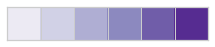

<Figure size 1296x1008 with 0 Axes>

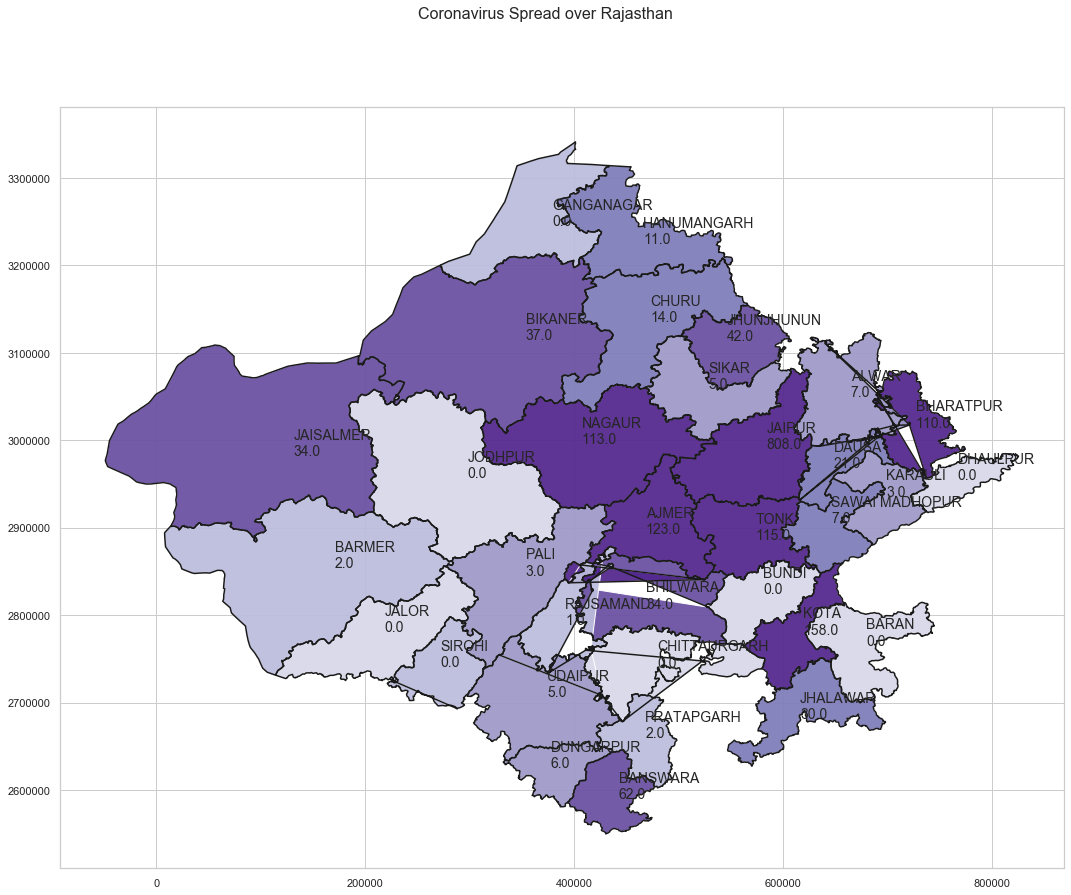

In [26]:
# reading data set
count = result.Count
# census_17.shape
#plotting
title = 'Coronavirus Spread over Rajasthan'
data = count
names = df.DIST_NAME
print(result[['DIST_NAME', 'Count']])
print("\n")
plot_cities_data(sf, title, names, data, 1, True)



Text(0.5, 1.0, 'Hotspot of Rajasthan')

<Figure size 792x648 with 0 Axes>

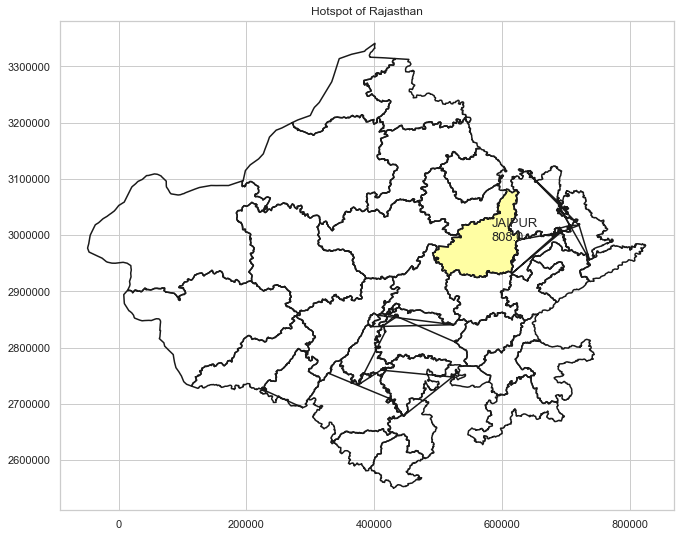

In [27]:
%matplotlib inline
plot_map_fill(26, sf,color='y')
plt.title("Hotspot of Rajasthan")

# DIST_NAME = 'JAISALMER'
# #to get the id of the city map to be plotted
# com_id = df[df.DIST_NAME == 'JAISALMER'].index[0]
# plot_shape(com_id, DIST_NAME)